# Base Médica

### Importe de Librerías

In [105]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR


### Autorización de uso desde Colaboratory

In [2]:
import zipfile
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Cargue de Información

In [54]:
base=pd.read_csv("/content/drive/MyDrive/Prueba/diabetic_data.csv")

### Exploración Inicial de Base

Dado que las variables como encounter_id patient_nbr son identificadores de los clientes se van dejar como index dentre de la base para que no sean tenido en cuenta como variable.

In [55]:
base.set_index(['encounter_id','patient_nbr'], inplace=True)
base.head(3)

,,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


In [158]:
base.shape

(101766, 45)

Asignación de códigos a  solumnas de la base

In [56]:
admission_type_id1={1:"Emergency",2:"Urgent",3:"Elective",4:"Newborn",5:"Not Available",6:"NULL",7:"Trauma Center",8:"Not Mapped"}
admission_source_id1={1:"Physician Referral",2:"Clinic Referral",3:"HMO Referral",4:"Transfer from a hospital",
5: "Transfer from a Skilled Nursing Facility (SNF)",6: "Transfer from another health care facility",
7: "Emergency Room",8: "Court/Law Enforcement",9: "Not Available",10: "Transfer from critial access hospital",
11:"Normal Delivery",12: "Premature Delivery",13: "Sick Baby",14: "Extramural Birth",15:"Not Available",
17:"NULL",18: "Transfer From Another Home Health Agency",19:"Readmission to Same Home Health Agency",
20: "Not Mapped",21:"Unknown/Invalid",22: "Transfer from hospital inpt/same fac reslt in a sep claim",
23: "Born inside this hospital",24: "Born outside this hospital",25: "Transfer from Ambulatory Surgery Center",
26:"Transfer from Hospice"}


In [57]:
discharge_disposition_id1={1:"Discharged to home",2:"Discharged/transferred to another short term hospital",
3:"Discharged/transferred to SNF",4:"Discharged/transferred to ICF",
5:"Discharged/transferred to another type of inpatient care institution",
6:"Discharged/transferred to home with home health service",
7:"Left AMA",8:"Discharged/transferred to home under care of Home IV provider",
9:"Admitted as an inpatient to this hospital",10:"Neonate discharged to another hospital for neonatal aftercare",
11:"Expired",12:"Still patient or expected to return for outpatient services",
13:"Hospice / home",14:"Hospice / medical facility",
15:"Discharged/transferred within this institution to Medicare approved swing bed",
16:"Discharged/transferred/referred another institution for outpatient services",
17:"Discharged/transferred/referred to this institution for outpatient services",
18:"NULL",19:"Expired at home. Medicaid only, hospice.",
20:"Expired in a medical facility. Medicaid only, hospice.",
21:"Expired, place unknown. Medicaid only, hospice.",
22:"Discharged/transferred to another rehab fac including rehab units of a hospital.",
23:"Discharged/transferred to a long term care hospital.",
24:"Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
25:"Not Mapped",26:"Unknown/Invalid",30:"Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
27:"Discharged/transferred to a federal health care facility.",
28:"Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
29:"Discharged/transferred to a Critical Access Hospital (CAH)."}

In [58]:
base["admission_source_id"]=base["admission_source_id"].map(admission_source_id1)
base["discharge_disposition_id"]=base["discharge_disposition_id"].map(discharge_disposition_id1)
base["admission_type_id"]=base["admission_type_id"].map(admission_type_id1)

In [59]:
base.value_counts("admission_source_id")/base.shape[0]

admission_source_id
Emergency Room                                               0.564963
Physician Referral                                           0.290519
NULL                                                         0.066633
Transfer from a hospital                                     0.031317
Transfer from another health care facility                   0.022247
Clinic Referral                                              0.010848
Transfer from a Skilled Nursing Facility (SNF)               0.008402
HMO Referral                                                 0.001838
Not Mapped                                                   0.001582
Not Available                                                0.001228
Court/Law Enforcement                                        0.000157
Transfer from hospital inpt/same fac reslt in a sep claim    0.000118
Transfer from critial access hospital                        0.000079
Normal Delivery                                              0.000020


Formato de Columnas para mantener un buen formato entre los nombre de las columnas

In [60]:
labels=base.isnull().sum().index
for i in labels:
    clear = i.replace("-","_")
    clear = clear.replace(" ","")
    clear = clear.lower()
    base.rename(columns={i:clear},inplace = True)    

In [61]:
base.columns  

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'a1cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted'],
      dtype='object')

Validando las dimensiones de la base 

In [62]:
base.shape

(101766, 48)

Tipo de variables por columna


In [63]:
base.dtypes

race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
a1cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

Validando registros duplicados

In [64]:
base.duplicated().sum()
# No existen registros duplicados a nivel de fila

0

Revisar si hay variables que siempre o prácticamente siempre toman el mismo valor: tomar siempre el mismo valor no aporta información al modelo

In [65]:
df_unique = pd.DataFrame(base.nunique(),columns=['val_unicos'])
df_unique[df_unique.val_unicos<2]

,val_unicos
examide,1
citoglipton,1


In [66]:
# Las variables "examide" y "citoglipton" no aportan por lo cual serán eliminadas de la base
base=base.drop(['examide','citoglipton'], axis=1)

 Categorías por Variable

In [67]:
a=base.columns

In [68]:
for i in a:
  print(pd.value_counts(base[i])/base.shape[0])


Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64
[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: age, dtype: float64
?            0.968585
[75-100)     0.013128
[50-75)      0.008814
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: weight, dtype: float64
Emergency        0.530531
Elective         0.185416
Urgent           0.181593
NULL             0.051992
Not Available    0.047020
Not Mapped       0.003144
Trauma Center    0.000206
Newborn          0.000098

### Analizar presencia de Nulos

Reemplazo de valores atipicos que pueden ser considerados como valores nulos, en este caso los valores de **?, NULL, Not Available, Not Mapped**  lo vamos a tomar como un valor nulo

In [69]:
# Reemplazo de valores atipicos que pueden ser considerados como valores nulos, en este caso los valores de ?, NULL
#Not Available,  lo vamos a tomar como un valor nulo
base.replace("?",np.nan, inplace=True)
base.replace("NULL",np.nan, inplace=True)
base.replace("Not Mapped",np.nan, inplace=True)
base.replace("Not Available ",np.nan, inplace=True)

#Solo se considera dos categorias de la varible genero Female y Male, por lo que la otra categoria se descarta como valor nulo
base["gender"].replace("Unknown/Invalid",np.nan, inplace=True)
base.head(3)

,,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,NaN,NaN,Physician Referral,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,Emergency,Discharged to home,Emergency Room,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NaN,Emergency,Discharged to home,Emergency Room,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


In [70]:
# validacion de registros que contienen valores nulos

filtro_nulos=pd.DataFrame(base.isnull().sum()/base.shape[0], columns=["filtro_nulos"])
filtro_nulos[filtro_nulos.filtro_nulos> 0]

,filtro_nulos
race,0.022336
gender,0.000029
weight,0.968585
admission_type_id,0.055136
discharge_disposition_id,0.045988
admission_source_id,0.068215
payer_code,0.395574
medical_specialty,0.490822
diag_1,0.000206
diag_2,0.003518


Se elimina la variable **weight** ya que gran parte de esta no se encuentra informada

In [71]:
base=base.drop(["weight"],axis=1)

Para las variables con mayor de 30% y menos del 90%, se valida la moda de los registros no nulos

In [72]:
pd.value_counts(base["payer_code"])/base.shape[0]

MC    0.318761
HM    0.061651
SP    0.049201
BC    0.045742
MD    0.034707
CP    0.024890
UN    0.024055
CM    0.019034
OG    0.010151
PO    0.005817
DM    0.005395
CH    0.001435
WC    0.001327
OT    0.000934
MP    0.000776
SI    0.000540
FR    0.000010
Name: payer_code, dtype: float64

In [73]:
pd.value_counts(base["medical_specialty"])/base.shape[0]

InternalMedicine                    0.143810
Emergency/Trauma                    0.074337
Family/GeneralPractice              0.073109
Cardiology                          0.052591
Surgery-General                     0.030452
                                      ...   
Surgery-PlasticwithinHeadandNeck    0.000010
Neurophysiology                     0.000010
SportsMedicine                      0.000010
Dermatology                         0.000010
Proctology                          0.000010
Name: medical_specialty, Length: 72, dtype: float64

Reemplazamos nulos por el valor de la moda en las varaibles requeridas	 

In [74]:
# Reemplazamos nulos por el valor de la moda en las varaibles "payer_code" y	"medical_specialty"	 

base["race"].fillna(base["race"].mode()[0], inplace=True)
base["gender"].fillna(base["gender"].mode()[0], inplace=True)
base["admission_type_id"].fillna(base["admission_type_id"].mode()[0], inplace=True)
base["discharge_disposition_id"].fillna(base["discharge_disposition_id"].mode()[0], inplace=True)
base["admission_source_id"].fillna(base["admission_source_id"].mode()[0], inplace=True)
base["payer_code"].fillna(base["payer_code"].mode()[0], inplace=True)
base["medical_specialty"].fillna(base["medical_specialty"].mode()[0], inplace=True)
base["diag_1"].fillna(base["diag_1"].mode()[0], inplace=True)
base["diag_2"].fillna(base["diag_2"].mode()[0], inplace=True)
base["diag_3"].fillna(base["diag_3"].mode()[0], inplace=True)

### Revisión de Outliers

In [75]:
columns_numericas = base.select_dtypes(include = np.number).columns.values
columns_numericas

array(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'], dtype=object)

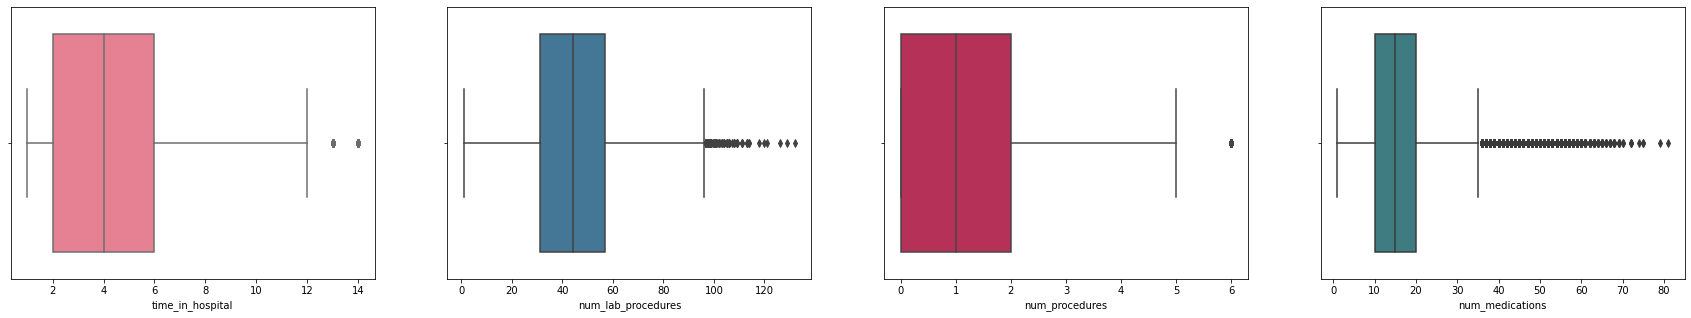

In [76]:
f, axes = plt.subplots(1, 4, figsize=(30,5))
sns.boxplot(x=base['time_in_hospital'],palette='husl',ax=axes[0])
sns.boxplot(x=base['num_lab_procedures'],palette='mako',ax=axes[1])
sns.boxplot(x=base['num_procedures'],palette='rocket',ax=axes[2])
sns.boxplot(x=base['num_medications'],palette='crest',ax=axes[3])

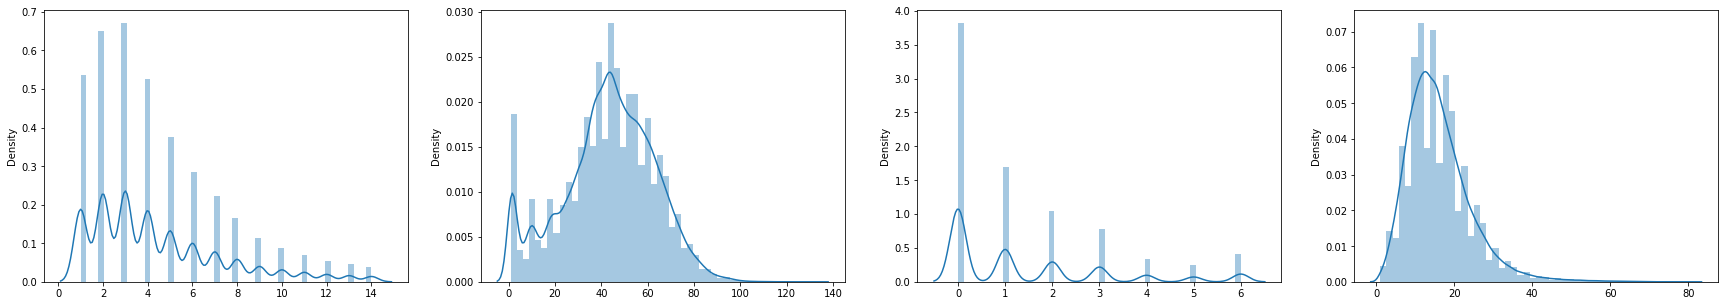

In [77]:
f, axes = plt.subplots(1, 4, figsize=(30,5))
sns.distplot(x=base['time_in_hospital'],ax=axes[0])
sns.distplot(x=base['num_lab_procedures'],ax=axes[1])
sns.distplot(x=base['num_procedures'],ax=axes[2])
sns.distplot(x=base['num_medications'],ax=axes[3])

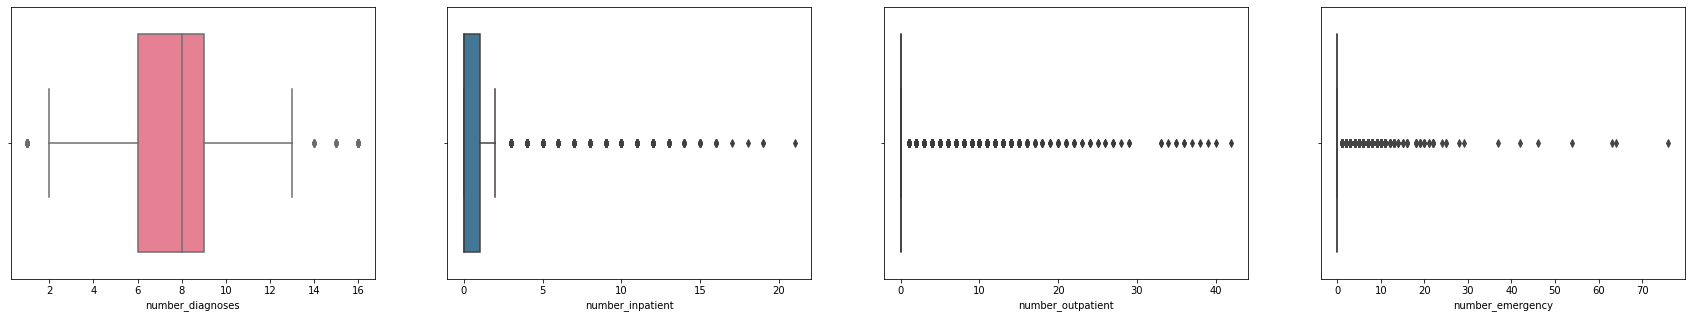

In [78]:
f, axes = plt.subplots(1, 4, figsize=(30,5))
sns.boxplot(x=base['number_diagnoses'],palette='husl',ax=axes[0])
sns.boxplot(x=base['number_inpatient'],palette='mako',ax=axes[1])
sns.boxplot(x=base['number_outpatient'],palette='crest',ax=axes[2])
sns.boxplot(x=base['number_emergency'],palette='rocket',ax=axes[3])

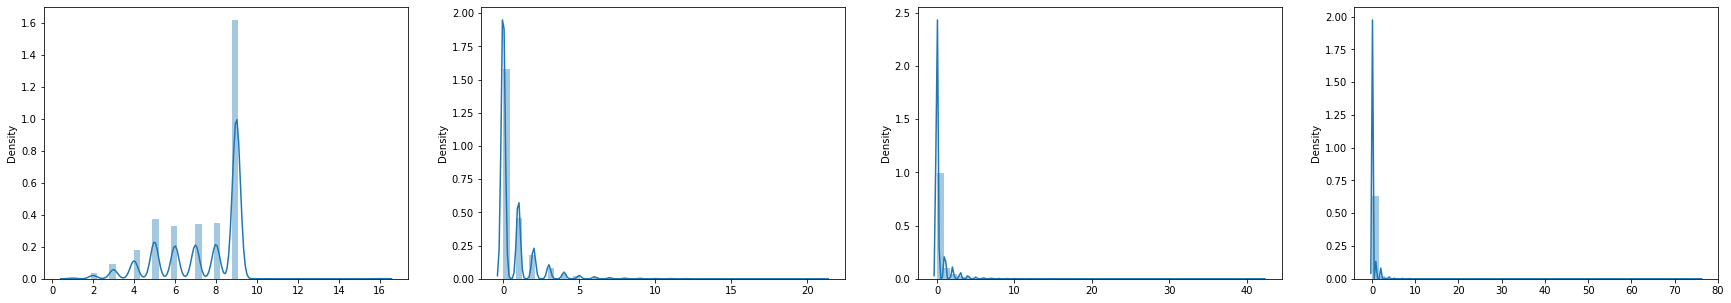

In [79]:
f, axes = plt.subplots(1, 4, figsize=(30,5))
sns.distplot(x=base['number_diagnoses'],ax=axes[0])
sns.distplot(x=base['number_inpatient'],ax=axes[1])
sns.distplot(x=base['number_outpatient'],ax=axes[2])
sns.distplot(x=base['number_emergency'],ax=axes[3])


In [80]:
base.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'a1cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted'],
      dtype='object')

In [81]:
base.head(5)

,,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),Emergency,Discharged to home,Physician Referral,1,MC,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,276,250,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,MC,InternalMedicine,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,MC,InternalMedicine,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,MC,InternalMedicine,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,MC,InternalMedicine,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [86]:
categoricas=base.select_dtypes(include=np.object)
categoricas.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'a1cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted'],
      dtype='object')

 Crear base de copia para no afectar el tratamiento previo

In [116]:
df=base.copy()

Creación de tablas cruzadas para validación de variable objetivo con las variables categoricas

In [117]:
pd.crosstab(df['readmitted'], df['admission_source_id'])

admission_source_id,Clinic Referral,Court/Law Enforcement,Emergency Room,Extramural Birth,HMO Referral,Normal Delivery,Not Available,Physician Referral,Sick Baby,Transfer from Ambulatory Surgery Center,Transfer from a Skilled Nursing Facility (SNF),Transfer from a hospital,Transfer from another health care facility,Transfer from critial access hospital,Transfer from hospital inpt/same fac reslt in a sep claim
readmitted,,,,,,,,,,,,,,,
<30,111,2,7448,0,29,0,13,3130,0,0,101,309,212,0,2
>30,310,4,24206,0,58,0,16,9640,0,0,236,672,398,2,3
NO,683,10,32782,2,100,2,96,16795,1,2,518,2206,1654,6,7


Se presentan muchas categorias por variables, así que se procede a unificar en categorias más generales

In [118]:
df.loc[df['race'].isin(['Asian','Hispanic']),'race']='Other'
df.loc[df['admission_type_id'].isin(['Newborn','Trauma Center']),'admission_type_id']='Not Available'

df.loc[df['admission_source_id'].isin(['Transfer from Ambulatory Surgery Center','Transfer from a Skilled Nursing Facility (SNF)',
                                       'Transfer from a hospital','Transfer from another health care facility','Transfer from critial access hospital',
                                       'Transfer from hospital inpt/same fac reslt in a sep claim']),'admission_source_id']='Transfer'
df.loc[df['admission_source_id'].isin(['Court/Law Enforcement','Extramural Birth','Normal Delivery','Not Available','Sick Baby','HMO Referral']),'admission_source_id']='Other'                                      

df.loc[df['discharge_disposition_id'].isin(['Expired','Expired at home. Medicaid only, hospice','Expired in a medical facility. Medicaid only, hospice.']),'discharge_disposition_id']='Expired'
df.loc[df['discharge_disposition_id'].isin(['Hospice / home','Hospice / medical facility']),'discharge_disposition_id']='Hospice'
df.loc[df['discharge_disposition_id'].isin(['Left AMA','Neonate discharged to another hospital for neonatal aftercare',
                                            'Still patient or expected to return for outpatient services','Admitted as an inpatient to this hospital']),'discharge_disposition_id']='Other'
df.loc[~df['discharge_disposition_id'].isin(['Expired','Hospice','Other']),'discharge_disposition_id']='Discharged '

df.loc[df['medical_specialty'].isin(['Cardiology-Pediatric']),'medical_specialty']='Cardiology'
df.loc[df['medical_specialty'].isin(['Neurology','Neurophysiology']),'medical_specialty']='Nephrology'
df.loc[df['medical_specialty'].isin(['Orthopedics-Reconstructive','Osteopath']),'medical_specialty']='Orthopedics'
df.loc[df['medical_specialty'].isin(['Pediatrics-AllergyandImmunology','Pediatrics-CriticalCare','Pediatrics-EmergencyMedicine','Pediatrics-Endocrinology',
                                     'Pediatrics-Hematology-Oncology','Pediatrics-InfectiousDiseases','Pediatrics-Neurology',
                                     'Pediatrics-Pulmonology']),'medical_specialty']='Pediatrics'
df.loc[df['medical_specialty'].isin(['Psychiatry-Addictive','Psychiatry-Child/Adolescent','Psychology']),'medical_specialty']='Psychiatry'  
df.loc[df['medical_specialty'].isin(['Radiology']),'medical_specialty']='Radiologist'                                    

df.loc[df['medical_specialty'].isin(['Surgeon','Surgery-Cardiovascular','Surgery-Cardiovascular/Thoracic','Surgery-Colon&Rectal',
                                     'Surgery-General','Surgery-Maxillofacial','Surgery-Neuro','Surgery-Pediatric','Surgery-Plastic',
                                     'Surgery-PlasticwithinHeadandNeck','Surgery-Thoracic','Surgery-Vascular','SurgicalSpecialty']),'medical_specialty']='Surgery-General'    
df.loc[df['medical_specialty'].isin(['Obsterics&Gynecology-GynecologicOnco','Obstetrics','ObstetricsandGynecology']),'medical_specialty']='Gynecology'
df.loc[~df['medical_specialty'].isin(['InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology',
                                      'Surgery-General','Nephrology','Gynecology','Orthopedics','Psychiatry','Radiologist']),'medical_specialty']='Other'


Son más categorias de lo que se pueden agrupar y no hay criteri clar para realizar tal agrupación, por lo que se procede a eliminar la siguientes variables.

In [119]:
df=df.drop(['payer_code','diag_1','diag_2','diag_3'], axis=1)

Asignación de variables objetivosa clasificación binaria 

In [120]:
df.loc[(df.readmitted=='>30') | (df.readmitted=='<30'),'y_bool' ]=1
df.loc[(df.readmitted=='NO'),'y_bool' ]=0

Formateo de variable objetivo

In [121]:
readmitted_bool ={'>30':1, '<30':2, 'NO':3}
df["readmitted"] = df["readmitted"].map(readmitted_bool)

In [122]:
serie = df.nunique()
serie

race                          3
gender                        2
age                          10
admission_type_id             4
discharge_disposition_id      4
admission_source_id           5
time_in_hospital             14
medical_specialty            11
num_lab_procedures          118
num_procedures                7
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             21
number_diagnoses             16
max_glu_serum                 4
a1cresult                     4
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglitazone                  4
rosiglitazone                 4
acarbose                      4
miglitol                      4
troglitazone                  2
tolazami

In [123]:
categoricas=df.select_dtypes(include=np.object)
categoricas.head(2)

,,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,medical_specialty,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),Emergency,Discharged,Physician Referral,Other,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged,Emergency Room,InternalMedicine,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes


Revisión de dimensión del dataset

In [124]:
categoricas.shape

(101766, 32)

Obtención de variables dummies por cada categoria de las variables categóricas

In [125]:
df_dummies=pd.get_dummies(df,columns=categoricas.columns)
df_dummies.head(3)

,,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,y_bool,race_AfricanAmerican,race_Caucasian,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),admission_type_id_Elective,admission_type_id_Emergency,admission_type_id_Not Available,admission_type_id_Urgent,discharge_disposition_id_Discharged,discharge_disposition_id_Expired,discharge_disposition_id_Hospice,discharge_disposition_id_Other,admission_source_id_Clinic Referral,admission_source_id_Emergency Room,admission_source_id_Other,admission_source_id_Physician Referral,admission_source_id_Transfer,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,...,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide_metformin_Down,glyburide_metformin_No,glyburide_metformin_Steady,glyburide_metformin_Up,glipizide_metformin_No,glipizide_metformin_Steady,glimepiride_pioglitazone_No,glimepiride_pioglitazone_Steady,metformin_rosiglitazone_No,metformin_rosiglitazone_Steady,metformin_pioglitazone_No,metformin_pioglitazone_Steady,change_Ch,change_No,diabetesmed_No,diabetesmed_Yes
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,1,41,0,1,0,0,0,1,3,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
149190,55629189,3,59,0,18,0,0,0,9,1,1.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
64410,86047875,2,11,5,13,2,0,1,6,3,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1


Validación de correlación más altas con relación a la variable objetivo binaria

In [126]:
#validación de las variables que tienen una correlación superior al 5%
df_numerical_corr = df_dummies.corr()['y_bool']
df_numerical_most_corr = df_numerical_corr[abs(df_numerical_corr) > 0.05].sort_values(ascending=False)
df_numerical_most_corr

y_bool                                  1.000000
number_inpatient                        0.217194
discharge_disposition_id_Discharged     0.115285
number_diagnoses                        0.112564
number_emergency                        0.103011
number_outpatient                       0.082142
admission_source_id_Emergency Room      0.080037
diabetesmed_Yes                         0.061508
time_in_hospital                        0.051289
admission_type_id_Elective             -0.050185
discharge_disposition_id_Hospice       -0.061233
diabetesmed_No                         -0.061508
admission_source_id_Transfer           -0.080120
discharge_disposition_id_Expired       -0.118478
readmitted                             -0.949091
Name: y_bool, dtype: float64

In [136]:
df_dummies.columns


Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted', 'y_bool',
       ...
       'glimepiride_pioglitazone_No', 'glimepiride_pioglitazone_Steady',
       'metformin_rosiglitazone_No', 'metformin_rosiglitazone_Steady',
       'metformin_pioglitazone_No', 'metformin_pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesmed_No', 'diabetesmed_Yes'],
      dtype='object', length=130)

Selección de variables según la correlación

In [137]:
df_dummies2=df_dummies[['y_bool','number_inpatient','number_diagnoses','number_emergency','number_outpatient','admission_source_id_Emergency Room',
                        'diabetesmed_Yes','time_in_hospital','admission_type_id_Elective','discharge_disposition_id_Hospice','admission_source_id_Transfer',
                        'discharge_disposition_id_Expired','readmitted']]

                      #discharge_disposition_id_Discharged


Segmentación de base entre Train y Test para Entrenamiento y validación del modelo

In [142]:
# Dividimos train/test. Normalizamos
X=df_dummies2.drop(['readmitted','y_bool'], axis=1)
Y=df_dummies2[['y_bool']]
X0_train, X0_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

transformer_spam = StandardScaler().fit(X0_train)  # X0--> Datos originales, X --> Normalizados
X_train = transformer_spam.transform(X0_train)
X_test = transformer_spam.transform(X0_test)



### Modelo KNN

In [143]:
# Entrenamiento k-NN con validación de vecinos
from sklearn import neighbors
K_max = 5
rango_K = np.arange(1, K_max+1)
nfold = 5
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
diccionario_parametros = [{'n_neighbors': rango_K,'weights':['uniform','distance']}]

# Validación cruzada con GridSearchCV
knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier( ), param_grid=diccionario_parametros,cv=nfold)
# Entrenamiento
knn.fit(X_train,Y_train)
# Test
accuracy_train_knn = knn.score(X_train,Y_train)
accuracy_test_knn = knn.score(X_test,Y_test)

print("El número de vecinos seleccionado es k={0:d}".format(knn.best_params_['n_neighbors']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))

El número de vecinos seleccionado es k=4
Accuracy train 64.68%. Accuracy test 58.37%



### Modelo Arboles de Decisión

In [144]:
# Entrenamiento DT con validación de profundidad
from sklearn import tree
max_depth = 15
rango_profundidad = np.arange(1, max_depth+1)
nfold = 5
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
diccionario_parametros = [{'max_depth': rango_profundidad}]

# Validación cruzada con GridSearchCV
tree_spam = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=diccionario_parametros,cv=nfold)
# Entrenamiento
tree_spam.fit(X_train,Y_train)
# Test
accuracy_train_dt = tree_spam.score(X_train,Y_train)
accuracy_test_dt = tree_spam.score(X_test,Y_test)

print("La profundidad seleccionada es depth={0:d}".format(tree_spam.best_params_['max_depth']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_dt*100, accuracy_test_dt*100))

La profundidad seleccionada es depth=8
Accuracy train 63.46%. Accuracy test 63.31%



### Modelo de Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

rango_estimadores = [10,20,50,100,200]
rango_hojas = [2,3,4,5,10,20,50,100,200]
nfold = 5
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
diccionario_parametros = [{'n_estimators': rango_estimadores, 'max_leaf_nodes': rango_hojas}]

# Validación cruzada con GridSearchCV
RF_spam = GridSearchCV(RandomForestClassifier(), param_grid=diccionario_parametros,cv=nfold)
# Entrenamiento
RF_spam.fit(X_train,Y_train)
# Test
accuracy_train_rf = RF_spam.score(X_train,Y_train)
accuracy_test_rf = RF_spam.score(X_test,Y_test)

print("El número de estimadores seleccionado es n_estimadores={0:d}".format(RF_spam.best_params_['n_estimators']))
print("El número de hojas máximo seleccionado es n_hojas={0:d}".format(RF_spam.best_params_['max_leaf_nodes']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_rf*100, accuracy_test_rf*100))

El número de estimadores seleccionado es n_estimadores=100
El número de hojas máximo seleccionado es n_hojas=50
Accuracy train 63.46%. Accuracy test 63.54%



### Modelo LDA

In [147]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

LDA = LDA()

LDA.fit(X_train,Y_train)
                    
accuracy_train_lda = LDA.score(X_train,Y_train)
accuracy_test_lda = LDA.score(X_test,Y_test)

print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_lda*100, accuracy_test_lda*100))

Accuracy train 62.46%. Accuracy test 62.50%



### Modelo de Regularización L2

In [148]:
# Entrenamiento RL con validación parámetro de regularización L2
rango_C = np.logspace(-2, 1, 20)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^-2, a 10^1.
diccionario_parametros = [{'C': rango_C}]
nfold = 5 # Número de particiones train/validación

RL_spam_L2  = GridSearchCV(estimator=LR(penalty='l2',max_iter=1e6),param_grid=diccionario_parametros,cv=nfold)
RL_spam_L2.fit(X_train,Y_train)
                    
accuracy_train_rl_l2 = RL_spam_L2.score(X_train,Y_train)
accuracy_test_rl_l2 = RL_spam_L2.score(X_test,Y__test)

print("El parámetro de regularización seleccionado es C={0:.2f}".format(RL_spam_L2.best_params_['C']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_rl_l2*100, accuracy_test_rl_l2*100))

El parámetro de regularización seleccionado es C=0.04
Accuracy train 62.78%. Accuracy test 62.84%



### Modelo de Regularización L1

In [149]:
# Entrenamiento RL con validación parámetro de regularización L1
rango_C = np.logspace(-2, 1, 20)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^-2, a 10^1.
diccionario_parametros = [{'C': rango_C}]
nfold = 5 # Número de particiones train/validación

RL_spam_L1  = GridSearchCV(estimator=LR(penalty='l1',max_iter=1e6,solver='liblinear'),
                           param_grid=diccionario_parametros,cv=nfold)
RL_spam_L1.fit(X_train,Y_train)
                    
accuracy_train_rl_l1 = RL_spam_L1.score(X_train,Y_train)
accuracy_test_rl_l1 = RL_spam_L1.score(X_test,Y_test)

print("El parámetro de regularización seleccionado es C={0:.2f}".format(RL_spam_L1.best_params_['C']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_rl_l1*100, accuracy_test_rl_l1*100))

El parámetro de regularización seleccionado es C=0.01
Accuracy train 62.82%. Accuracy test 62.97%



### Segmentación de train y test para clasificar 3 categorías

In [152]:
# Dividimos train/test. Normalizamos
X1=df_dummies2.drop(['readmitted','y_bool'], axis=1)
Y1=df_dummies2[['readmitted']]
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(x_train) 
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

#### One vs Rest Classifier con L2

In [153]:
from sklearn.multiclass import OneVsRestClassifier


# Parameters
rango_C = np.logspace(-2, 2, 5)
nfold = 5
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
diccionario_parametros = [{'C': rango_C}]

# Validación cruzada con GridSearchCV
mi_LR = GridSearchCV(estimator=LR(penalty='l2'), param_grid=diccionario_parametros,cv=nfold)

mi_LR_OneVsRest = OneVsRestClassifier(mi_LR).fit(x_train_s,y_train)

In [154]:
# Accuracy

accuracy_train = mi_LR_OneVsRest.score(x_train_s,y_train)
accuracy_test = mi_LR_OneVsRest.score(x_test_s,y_test)

print("Accuracy train {0:f}%. Accuracy test {1:f}%\n".format(accuracy_train*100, accuracy_test*100))

Accuracy train 57.326352%. Accuracy test 57.468064%

